## Import Dependencies

In [1]:
# Initial Imports.
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

## Import Dataset

In [2]:
charity_df = pd.read_csv('charity_data.csv')
charity_df.shape

(34299, 12)

## Inspect the Data

In [3]:
# Find the null values, if any.
for column in charity_df.columns:
    print(f"Column{column} has {charity_df[column].isnull().sum()} null values")

ColumnEIN has 0 null values
ColumnNAME has 0 null values
ColumnAPPLICATION_TYPE has 0 null values
ColumnAFFILIATION has 0 null values
ColumnCLASSIFICATION has 0 null values
ColumnUSE_CASE has 0 null values
ColumnORGANIZATION has 0 null values
ColumnSTATUS has 0 null values
ColumnINCOME_AMT has 0 null values
ColumnSPECIAL_CONSIDERATIONS has 0 null values
ColumnASK_AMT has 0 null values
ColumnIS_SUCCESSFUL has 0 null values


In [4]:
# Find duplicate entries, if any.
print(f"Duplicate entries: {charity_df.duplicated().sum()}")

Duplicate entries: 0


In [5]:
charity_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [6]:
# Drop EIN and NAME columns
charity_df = charity_df.drop(["EIN","NAME"],1)
charity_df.head(5)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [7]:
# Check the number of unique values in each column
charity_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [8]:
class_counts = charity_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1237        9
         ...  
C3200        2
C1267        2
C1246        2
C1256        2
C1370        1
C2500        1
C1570        1
C6100        1
C2380        1
C4500        1
C2170        1
C4120        1
C2561        1
C1248        1
C2190        1
C1732        1
C4200        1
C1580        1
C1283        1
C1900        1
C3700        1
C1820        1
C1245        1
C2600        1
C1728        1
C8210        1
C1236        1
C2570        1
C2150        1
C5200        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [9]:
app_counts = charity_df.APPLICATION_TYPE.value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

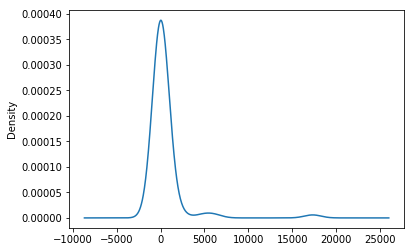

In [10]:
# Visualize the value counts of the Classification column
class_counts.plot.density()

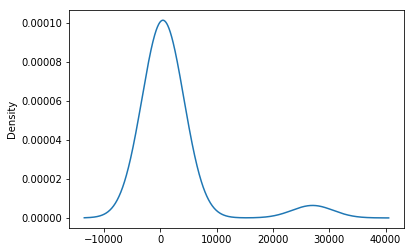

In [11]:
# Visualize the value counts of the Application_Type column
app_counts.plot.density()

## Create Buckets for Classification and Application_Type Columns

In [12]:
# Determine which Classification values to replace
replace_classification = list(class_counts[class_counts < 1000].index)

# Replace in DataFrame
for classification in replace_classification:
    charity_df.CLASSIFICATION = charity_df.CLASSIFICATION.replace(classification,"Other")


# Check to make sure binning was successful
charity_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [13]:
charity_df.shape

(34299, 10)

In [14]:
# Determine which Application_Types values to replace
replace_application = list(app_counts[app_counts < 500].index)

# Replace in DataFrame
for application in replace_application:
    charity_df.APPLICATION_TYPE = charity_df.APPLICATION_TYPE.replace(application,"Other")


# Check to make sure binning was successful
charity_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [15]:
charity_df.shape

(34299, 10)

In [16]:
# Generate the categorical variable list
charity_cat = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()

## Encode the data with OneHotEncoder

In [17]:
# Generate our categorical variable list
charity_cat = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()

In [18]:
# Create the OneHotEncoder instance.
enc = OneHotEncoder(sparse=False)

In [19]:
# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(charity_df[charity_cat]))

In [20]:
# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(charity_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Merge the Dataframes and Drop Unnecessary Columns

In [21]:
# Merge the charity_df and encode_df DataFrames together and drop the Classification column
charity_df = charity_df.merge(encode_df,left_index=True,right_index=True)
charity_df = charity_df.drop(charity_cat,1)
charity_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1,5000,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1,31452,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1,7508025,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,1,94389,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Standardize Numerical Variables 

In [22]:
# Remove IS_SUCCESSFUL target from features data
y = charity_df["IS_SUCCESSFUL"].values
X = charity_df.drop(["IS_SUCCESSFUL"],1).values

In [23]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [24]:
# Create a StandardScaler instance
scaler = StandardScaler()

In [25]:
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

In [26]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Use Random Forest Model

In [27]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.710


## Use a Deep Neural Network

In [28]:
# Define the model - A deep neural network
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 25

nn = tf.keras.models.Sequential()

# Add the first hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Add the output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics.
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data.
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 2s 74us/sample - loss: 0.5719 - accuracy: 0.7215
Epoch 2/50
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5562 - accuracy: 0.7307
Epoch 3/50
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5528 - accuracy: 0.7303
Epoch 4/50
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5525 - accuracy: 0.7313
Epoch 5/50
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5509 - accuracy: 0.7308
Epoch 6/50
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5502 - accuracy: 0.7311
Epoch 7/50
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5487 - accuracy: 0.7323
Epoch 8/50
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5479 - accuracy: 0.7331
Epoch 9/50
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5467 - accuracy: 0.7331
Epoch 10/50
25

In [29]:
# Check the structure of the model.
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 25)                2025      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 5,571
Trainable params: 5,571
Non-trainable params: 0
_________________________________________________________________


## Visualize the Loss and Accuracy

In [30]:
# Create a DataFrame containing training the history of the loss and accuracy history.
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

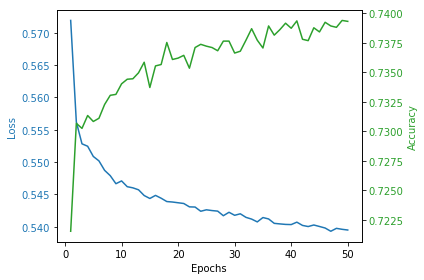

In [31]:
# Create the plot visualizing that as the loss is reduced the accuracy increases over each epoch.
loss_test = history_df['loss']
accur_test = history_df['accuracy']
epochs = range(1,50)

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color=color)
ax1.plot(loss_test, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis.

color = 'tab:green'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(accur_test, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Ensuring the right y-label is not slightly clipped.
plt.show()